In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

In [4]:
f1 = pd.read_csv('complete.csv')

In [5]:
f1.head()

,resultId,raceId,driverId,constructorId,statusId,qualifyId,year,round,circuitId,race_name,...,positionOrder,points,laps,result_time,result_milliseconds,fastestLap,fastestLapTime,rank,status,avg_lap_position
0,1,18,1,1,1,1.0,2008,1,1,Australian Grand Prix,...,1,10.0,58,1:34:50.616,5690616.0,39,1:27.452,2,Finished,1.258621
1,2,18,2,2,1,5.0,2008,1,1,Australian Grand Prix,...,2,8.0,58,+5.478,5696094.0,41,1:27.739,3,Finished,3.655172
2,3,18,3,3,1,7.0,2008,1,1,Australian Grand Prix,...,3,6.0,58,+8.163,5698779.0,41,1:28.090,5,Finished,4.206897
3,4,18,4,4,1,12.0,2008,1,1,Australian Grand Prix,...,4,5.0,58,+17.181,5707797.0,58,1:28.603,7,Finished,7.982759
4,5,18,5,1,1,3.0,2008,1,1,Australian Grand Prix,...,5,4.0,58,+18.014,5708630.0,43,1:27.418,1,Finished,2.965517


In [6]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   resultId               26759 non-null  int64  
 1   raceId                 26759 non-null  int64  
 2   driverId               26759 non-null  int64  
 3   constructorId          26759 non-null  int64  
 4   statusId               26759 non-null  int64  
 5   qualifyId              10494 non-null  float64
 6   year                   26759 non-null  int64  
 7   round                  26759 non-null  int64  
 8   circuitId              26759 non-null  int64  
 9   race_name              26759 non-null  object 
 10  date                   26759 non-null  object 
 11  driverRef              26759 non-null  object 
 12  forename               26759 non-null  object 
 13  surname                26759 non-null  object 
 14  nationality_x          26759 non-null  object 
 15  co

In [7]:
X = f1.drop('points',axis=1) 

In [8]:
X= X.select_dtypes(exclude=['object'])

In [9]:
X = X.drop(['qualifyId', 'qualifying_car_number'], axis=1)

In [10]:
X.isnull().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
statusId               0
year                   0
round                  0
circuitId              0
car_number             0
grid                   0
final_position         0
positionOrder          0
laps                   0
result_milliseconds    0
fastestLap             0
rank                   0
avg_lap_position       0
dtype: int64

In [11]:
y = f1['points'] 

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2529)

In [13]:
reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
# Predict on test data
y_pred = reg_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error
mea = mean_absolute_error(y_test, y_pred)

In [16]:
print(f"Mean Absolute Error: {mea}")

Mean Absolute Error: 0.02798512705530642


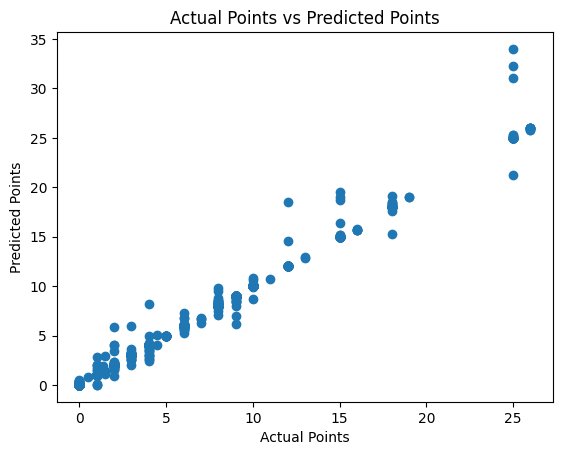

In [17]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual Points vs Predicted Points")
plt.show()

7153      4.0
23196     0.0
8804      4.0
25064    10.0
21240     0.0
Name: points, dtype: float64

In [28]:
output = pd.DataFrame({
    'driverId': X_test['driverId'],   
    'Actual Points': y_test,
    'Predicted Points': y_pred
})


In [29]:
output = output.sort_values(by='Predicted Points', ascending=False)
print(output.head(10))  


       driverId  Actual Points  Predicted Points
21661         1           25.0             34.00
21685        18           25.0             32.25
21205        17           25.0             31.01
26020       830           26.0             26.00
25120       830           26.0             26.00
24840         1           26.0             26.00
25080       830           26.0             26.00
25480       830           26.0             26.00
24380         1           26.0             25.97
25380       830           26.0             25.88


In [51]:

names_df = f1.loc[X_test.index, ['forename', 'surname', 'driverId']].copy()
names_df['Name'] = names_df['forename'] + ' ' + names_df['surname']

output2 = pd.DataFrame({
    'Name': names_df['Name'],
    'driverId': names_df['driverId'],
    'Actual Points': y_test,
    'Predicted Points': y_pred
})


In [30]:
# pd.set_option('display.max_columns', None)
# f1.head()

In [52]:
output2 = output2.sort_values(by='Predicted Points', ascending=False)
print(output2.head(20))  


                   Name  driverId  Actual Points  Predicted Points
21661    Lewis Hamilton         1           25.0             34.00
21685     Jenson Button        18           25.0             32.25
21205       Mark Webber        17           25.0             31.01
26020    Max Verstappen       830           26.0             26.00
25120    Max Verstappen       830           26.0             26.00
24840    Lewis Hamilton         1           26.0             26.00
25080    Max Verstappen       830           26.0             26.00
25480    Max Verstappen       830           26.0             26.00
24380    Lewis Hamilton         1           26.0             25.97
25380    Max Verstappen       830           26.0             25.88
25360    Lewis Hamilton         1           26.0             25.84
24197   Valtteri Bottas       822           26.0             25.81
26240    Max Verstappen       830           25.0             25.28
24137    Max Verstappen       830           25.0             2

In [53]:
X_test.head()

,resultId,raceId,driverId,constructorId,statusId,year,round,circuitId,car_number,grid,final_position,positionOrder,laps,result_milliseconds,fastestLap,rank,avg_lap_position
7153,7154,325,95,6,1,1990,5,7,2,7,3,3,70,6189785.0,0,-1,-1.000000
23196,23201,960,18,1,130,2016,13,13,22,9,99,21,1,15100540.0,0,0,20.000000
8804,8805,382,122,37,1,1988,11,13,16,14,3,3,43,5356317.0,0,-1,-1.000000
25064,25070,1057,846,1,1,2021,6,73,4,9,5,5,51,8021164.0,41,7,9.137255
21240,21243,860,3,131,1,2012,1,1,8,7,12,12,58,5707207.0,53,14,7.293103


In [54]:
race_info = f1.loc[X_test.index, ['raceId', 'race_name']].reset_index(drop=True)

# Reset index of output to align
output = output.reset_index(drop=True)
output2 = output2.reset_index(drop=True)

# Add raceId and race_name to output
output['raceId'] = race_info['raceId']
output['race_name'] = race_info['race_name']

output2['race_name'] = race_info['race_name']


In [55]:
output.head()


,driverId,Actual Points,Predicted Points,raceId,race_name
0,1,25.0,34.00,325,Canadian Grand Prix
1,18,25.0,32.25,960,Belgian Grand Prix
2,17,25.0,31.01,382,Belgian Grand Prix
3,830,26.0,26.00,1057,Azerbaijan Grand Prix
4,830,26.0,26.00,860,Australian Grand Prix


In [59]:
output2.head(20)

,Name,driverId,Actual Points,Predicted Points,race_name
0,Lewis Hamilton,1,25.0,34.00,Canadian Grand Prix
1,Jenson Button,18,25.0,32.25,Belgian Grand Prix
2,Mark Webber,17,25.0,31.01,Belgian Grand Prix
3,Max Verstappen,830,26.0,26.00,Azerbaijan Grand Prix
4,Max Verstappen,830,26.0,26.00,Australian Grand Prix
5,Lewis Hamilton,1,26.0,26.00,Brazilian Grand Prix
6,Max Verstappen,830,26.0,26.00,Monaco Grand Prix
7,Max Verstappen,830,26.0,26.00,Emilia Romagna Grand Prix
8,Lewis Hamilton,1,26.0,25.97,Turkish Grand Prix
9,Max Verstappen,830,26.0,25.88,United States Grand Prix West
